In [1]:
# from importib import reload
%load_ext autoreload

In [2]:
import os
import sys
import joblib

sys.path.append('..')

from scripts.data_utils.loaders import *
from scripts.data_utils.cleaning import *
# from scripts.data_utils.feature_engineering import *
from scripts.modeling.preprocessing import *
from scripts.utils.visualizations import plot_actual_vs_predicted, plot_feature_importances, plot_training_history
from scripts.modeling.evaluation import *
from scripts.modeling.model_selection import *
# from tensorflow.keras.models import load_model

%autoreload 2

# Load datasets

In [3]:
train_path = "../resources/data/train.csv"
train_path = "../resources/data/train.csv"
test_path = "../resources/data/test.csv"
store_path = "../resources/data/store.csv"

train = load_csv(train_path)
test = load_csv(test_path)
store = load_csv(store_path)

train.shape, test.shape, store.shape

2025-01-12 13:47:47 - INFO - Loading data from file ...
2025-01-12 13:47:47 - INFO - Loading data from file ...
2025-01-12 13:47:47 - INFO - Loading data from file ...
2025-01-12 13:47:47 - INFO - Loading data from file ...
2025-01-12 13:47:47 - INFO - Loading data from file ...
2025-01-12 13:47:47 - INFO - Loading data from file ...
2025-01-12 13:47:47 - INFO - Loading data from file ...
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\data_utils\loaders.py:22: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=sep)
2025-01-12 13:47:47 - INFO - Loaded data from ../resources/data/train.csv, shape: (1017209, 9)
2025-01-12 13:47:47 - INFO - Loaded data from ../resources/data/train.csv, shape: (1017209, 9)
2025-01-12 13:47:47 - INFO - Loaded data from ../resources/data/train.csv, shape: (1017209, 9)
2025-01-12 13:47:47 - INFO - Loaded data from ../resources/data/train.csv, shape: (1

((1017209, 9), (41088, 8), (1115, 10))

In [4]:
train = clean_data(train)
test = clean_data(test)
train.shape, test.shape, store.shape

((1017209, 9), (41088, 7), (1115, 10))

In [ ]:
train.columns, test.columns, store.columns

# Feature Engineering

In [19]:
# data = test.merge(store, on='Store', how='left')
group_by = 'Store'
train_preprocessed, test_preprocessed, store_preprocessed, scaler, label_encoders = preprocess_datasets(
    train, test, store, method='label', group_by=group_by
)
# # Save Encoders and Scaler models for a later use in deployment
# joblib.dump(scaler, "../resources/scalers/scaler.pkl")
# joblib.dump(label_encoders, "../resources/encoders/encoders.pkl")

store_preprocessed

2025-01-12 14:01:32 - INFO - Starting to handle missing data for store dataset...
2025-01-12 14:01:32 - INFO - Starting to handle missing data for store dataset...
2025-01-12 14:01:32 - INFO - Starting to handle missing data for store dataset...
2025-01-12 14:01:32 - INFO - Starting to handle missing data for store dataset...
2025-01-12 14:01:32 - INFO - Starting to handle missing data for store dataset...
2025-01-12 14:01:32 - INFO - Starting to handle missing data for store dataset...
2025-01-12 14:01:32 - INFO - Starting to handle missing data for store dataset...
2025-01-12 14:01:32 - INFO - Starting to handle missing data for store dataset...
2025-01-12 14:01:32 - INFO - Starting to handle missing data for store dataset...
2025-01-12 14:01:32 - INFO - Starting to handle missing data for store dataset...
2025-01-12 14:01:32 - INFO - Missing data handled successfully using imputers for store dataset.
2025-01-12 14:01:32 - INFO - Missing data handled successfully using imputers for s

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,SalesPerCustomer,PromoEffectiveness
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NoPromo,2008-09-01,8.393038,5300.111429
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2007-11-01,8.408443,6277.440678
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2006-12-01,9.117599,8854.628571
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,NoPromo,2009-09-01,7.249827,10576.158640
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,NoPromo,2015-04-01,8.611229,6096.683761
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2014-06-01,11.547388,6578.017143
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,NoPromo,2006-04-01,11.993853,12847.231429
1112,1113,a,c,9260.0,1.0,2010.0,0,0.0,0.0,NoPromo,2010-01-01,9.211189,7465.243626
1113,1114,a,c,870.0,1.0,2010.0,0,0.0,0.0,NoPromo,2010-01-01,6.454992,22029.855524


In [7]:
train.columns, train_preprocessed.columns

(Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday'],
       dtype='object'),
 Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday', 'SalesPerCustomer',
        'PromoEffectiveness', 'SalesGrowthRate', 'StoreType', 'Assortment',
        'CompetitionDistance', 'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
        'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSince', 'IsHoliday',
        'Year', 'Month', 'Day', 'Week', 'WeekOfYear', 'Weekday', 'IsWeekend',
        'BeforeAfterCompetitorOpening', 'CompetitionActive', 'Promo2Active',
        'CompetitionMonthsOpen', 'Promo2WeeksActive'],
       dtype='object'))

In [8]:
test.columns, test_preprocessed.columns

(Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
        'SchoolHoliday'],
       dtype='object'),
 Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
        'SchoolHoliday', 'SalesPerCustomer', 'PromoEffectiveness',
        'SalesGrowthRate', 'StoreType', 'Assortment', 'CompetitionDistance',
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
        'CompetitionOpenSince', 'IsHoliday', 'Year', 'Month', 'Day', 'Week',
        'WeekOfYear', 'Weekday', 'IsWeekend', 'BeforeAfterCompetitorOpening',
        'CompetitionActive', 'Promo2Active', 'CompetitionMonthsOpen',
        'Promo2WeeksActive'],
       dtype='object'))

In [9]:
store.columns, store_preprocessed.columns

(Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
       dtype='object'),
 Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
        'CompetitionOpenSince', 'SalesPerCustomer', 'PromoEffectiveness'],
       dtype='object'))

# Models

In [35]:
# Define features and target
target = "Sales"
drop_columns = ["Sales", "Customers", "Date", "DayOfWeek", "Store", "SalesGrowthRate", "CompetitionOpenSince"]
                #"SalesPerCustomer", "BeforeAfterCompetitorOpening", # "Holiday", "Holiday_Status", 

X, y = prepare_data_for_modeling(train_preprocessed, target, drop_columns)
X_train, y_train, X_val, y_val = split_data(X, y)

# Training and Validation set
X_train.shape, X_val.shape

((813767, 28), (203442, 28))

In [36]:
linear_model = train_linear_regression(X_train, y_train)
linear_model

2025-01-12 15:23:57 - INFO - Starting to train linear regression model...
2025-01-12 15:23:57 - INFO - Starting to train linear regression model...
2025-01-12 15:23:57 - INFO - Starting to train linear regression model...
2025-01-12 15:23:57 - INFO - Starting to train linear regression model...
2025-01-12 15:23:57 - INFO - Starting to train linear regression model...
2025-01-12 15:23:57 - INFO - Starting to train linear regression model...
2025-01-12 15:23:57 - INFO - Starting to train linear regression model...
2025-01-12 15:23:57 - INFO - Starting to train linear regression model...
2025-01-12 15:23:57 - INFO - Starting to train linear regression model...
2025-01-12 15:23:57 - INFO - Starting to train linear regression model...
2025-01-12 15:23:57 - INFO - Starting to train linear regression model...
2025-01-12 15:23:58 - INFO - Linear regression model training completed.
2025-01-12 15:23:58 - INFO - Linear regression model training completed.
2025-01-12 15:23:58 - INFO - Linear regr

LinearRegression()

In [37]:
# Training Set Performance evaluation
y_pred_train = predict(linear_model, X_train)
evaluate_model(y_train, y_pred_train)

2025-01-12 15:23:58 - INFO - Starting prediction process...
2025-01-12 15:23:58 - INFO - Starting prediction process...
2025-01-12 15:23:58 - INFO - Starting prediction process...
2025-01-12 15:23:58 - INFO - Starting prediction process...
2025-01-12 15:23:58 - INFO - Starting prediction process...
2025-01-12 15:23:58 - INFO - Starting prediction process...
2025-01-12 15:23:58 - INFO - Starting prediction process...
2025-01-12 15:23:58 - INFO - Starting prediction process...
2025-01-12 15:23:58 - INFO - Starting prediction process...
2025-01-12 15:23:58 - INFO - Starting prediction process...
2025-01-12 15:23:58 - INFO - Starting prediction process...
2025-01-12 15:23:59 - INFO - Prediction process completed.
2025-01-12 15:23:59 - INFO - Prediction process completed.
2025-01-12 15:23:59 - INFO - Prediction process completed.
2025-01-12 15:23:59 - INFO - Prediction process completed.
2025-01-12 15:23:59 - INFO - Prediction process completed.
2025-01-12 15:23:59 - INFO - Prediction proce

{'MAE': 2143.85107421875,
 'MSE': 8300297.0,
 'RMSE': 2881.02360281897,
 'R2': 0.44031113386154175,
 'Median AE': 1574.6611,
 'Explained Variance': 0.44031113386154175}

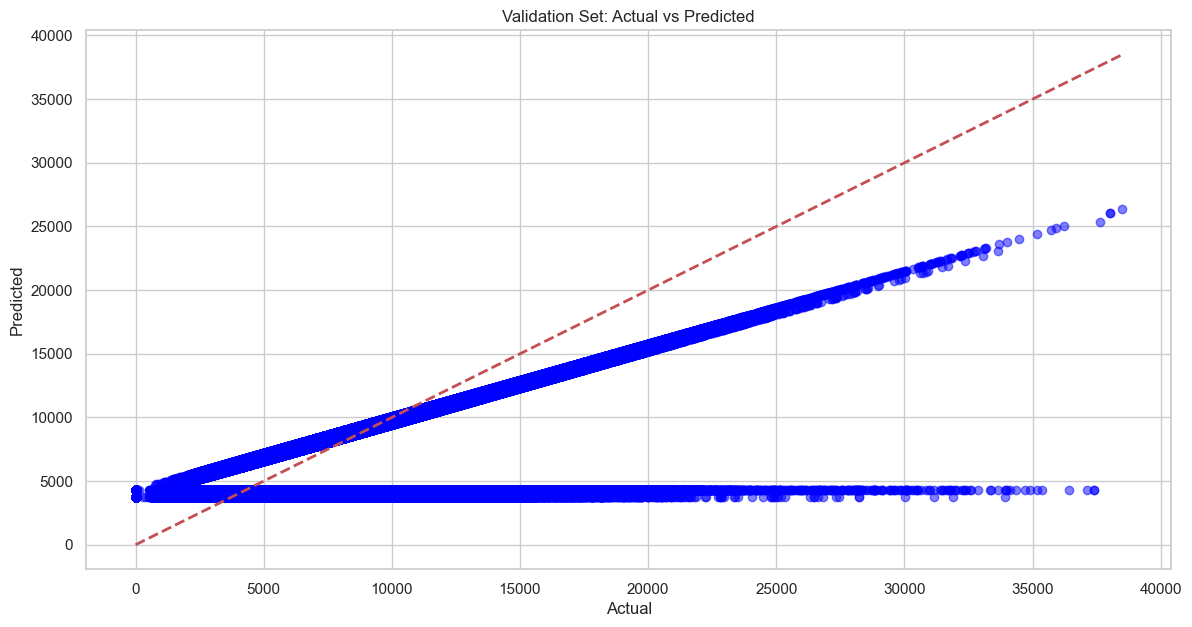

In [38]:
# Plot results
plot_actual_vs_predicted(y_train, y_pred_train, "Validation Set")

In [39]:
# Validation Set Performance evaluation
y_pred_val = predict(linear_model, X_val)
evaluate_model(y_val, y_pred_val)

2025-01-12 15:24:04 - INFO - Starting prediction process...
2025-01-12 15:24:04 - INFO - Starting prediction process...
2025-01-12 15:24:04 - INFO - Starting prediction process...
2025-01-12 15:24:04 - INFO - Starting prediction process...
2025-01-12 15:24:04 - INFO - Starting prediction process...
2025-01-12 15:24:04 - INFO - Starting prediction process...
2025-01-12 15:24:04 - INFO - Starting prediction process...
2025-01-12 15:24:04 - INFO - Starting prediction process...
2025-01-12 15:24:04 - INFO - Starting prediction process...
2025-01-12 15:24:04 - INFO - Starting prediction process...
2025-01-12 15:24:04 - INFO - Starting prediction process...
2025-01-12 15:24:04 - INFO - Prediction process completed.
2025-01-12 15:24:04 - INFO - Prediction process completed.
2025-01-12 15:24:04 - INFO - Prediction process completed.
2025-01-12 15:24:04 - INFO - Prediction process completed.
2025-01-12 15:24:04 - INFO - Prediction process completed.
2025-01-12 15:24:04 - INFO - Prediction proce

{'MAE': 2147.82568359375,
 'MSE': 8337715.5,
 'RMSE': 2887.5102597220325,
 'R2': 0.4362141489982605,
 'Median AE': 1575.5386,
 'Explained Variance': 0.4362142086029053}

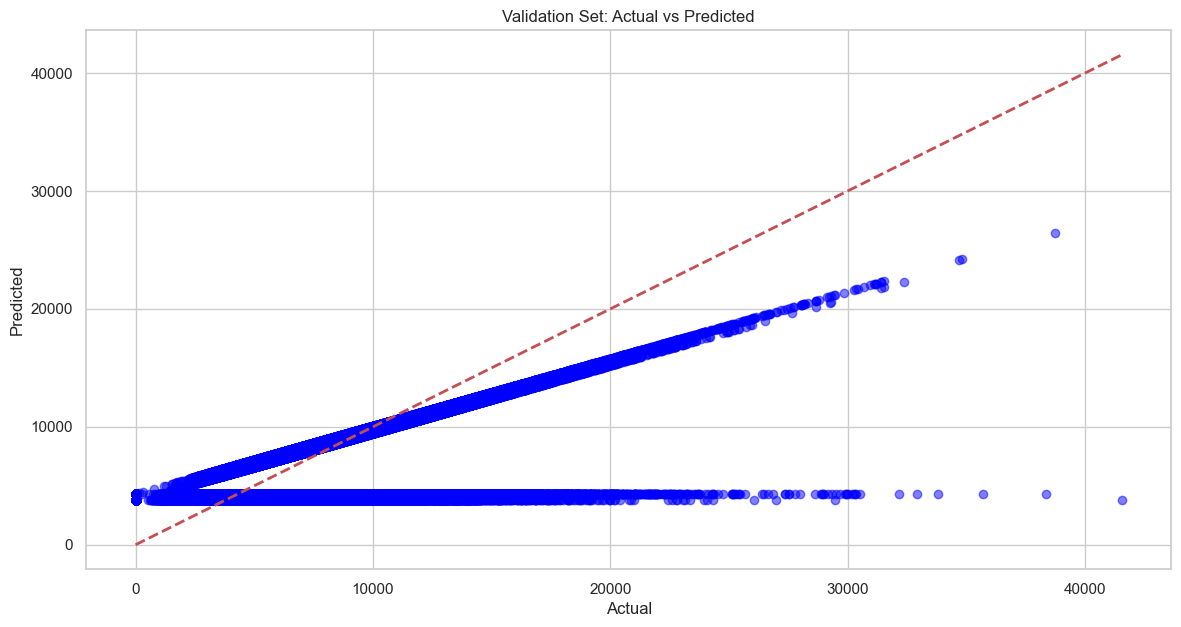

In [40]:
# Evaluate and plot results
plot_actual_vs_predicted(y_val, y_pred_val, "Validation Set")

In [41]:
joblib.dump(linear_model, "../resources/models/linear_model.pkl")

['../resources/models/linear_model.pkl']

In [42]:
# Testing Set Performance evaluation
y_pred_test = predict(linear_model, X_test)
y_pred_test

2025-01-12 15:24:07 - INFO - Starting prediction process...
2025-01-12 15:24:07 - INFO - Starting prediction process...
2025-01-12 15:24:07 - INFO - Starting prediction process...
2025-01-12 15:24:07 - INFO - Starting prediction process...
2025-01-12 15:24:07 - INFO - Starting prediction process...
2025-01-12 15:24:07 - INFO - Starting prediction process...
2025-01-12 15:24:07 - INFO - Starting prediction process...
2025-01-12 15:24:07 - INFO - Starting prediction process...
2025-01-12 15:24:07 - INFO - Starting prediction process...
2025-01-12 15:24:07 - INFO - Starting prediction process...
2025-01-12 15:24:07 - INFO - Starting prediction process...
2025-01-12 15:24:08 - INFO - Prediction process completed.
2025-01-12 15:24:08 - INFO - Prediction process completed.
2025-01-12 15:24:08 - INFO - Prediction process completed.
2025-01-12 15:24:08 - INFO - Prediction process completed.
2025-01-12 15:24:08 - INFO - Prediction process completed.
2025-01-12 15:24:08 - INFO - Prediction proce

array([ 7324.9375,  8839.666 , 10316.934 , ...,  8565.229 , 16908.54  ,
        7934.701 ], dtype=float32)

Random Forest

In [43]:
rf_model = train_random_forest(X_train, y_train)
rf_model

2025-01-12 15:24:08 - INFO - Starting to train random forest model...
2025-01-12 15:24:08 - INFO - Starting to train random forest model...
2025-01-12 15:24:08 - INFO - Starting to train random forest model...
2025-01-12 15:24:08 - INFO - Starting to train random forest model...
2025-01-12 15:24:08 - INFO - Starting to train random forest model...
2025-01-12 15:24:08 - INFO - Starting to train random forest model...
2025-01-12 15:24:08 - INFO - Starting to train random forest model...
2025-01-12 15:24:08 - INFO - Starting to train random forest model...
2025-01-12 15:24:08 - INFO - Starting to train random forest model...
2025-01-12 15:24:08 - INFO - Starting to train random forest model...
2025-01-12 15:24:08 - INFO - Starting to train random forest model...
2025-01-12 15:58:44 - INFO - Random forest model training completed.
2025-01-12 15:58:44 - INFO - Random forest model training completed.
2025-01-12 15:58:44 - INFO - Random forest model training completed.
2025-01-12 15:58:44 - I

RandomForestRegressor(random_state=42)

In [44]:
# Training Set Performance evaluation
y_pred_train_rf = predict(rf_model, X_train)
evaluate_model(y_train, y_pred_train_rf)

2025-01-12 15:58:44 - INFO - Starting prediction process...
2025-01-12 15:58:44 - INFO - Starting prediction process...
2025-01-12 15:58:44 - INFO - Starting prediction process...
2025-01-12 15:58:44 - INFO - Starting prediction process...
2025-01-12 15:58:44 - INFO - Starting prediction process...
2025-01-12 15:58:44 - INFO - Starting prediction process...
2025-01-12 15:58:44 - INFO - Starting prediction process...
2025-01-12 15:58:44 - INFO - Starting prediction process...
2025-01-12 15:58:44 - INFO - Starting prediction process...
2025-01-12 15:58:44 - INFO - Starting prediction process...
2025-01-12 15:58:44 - INFO - Starting prediction process...
2025-01-12 15:59:54 - INFO - Prediction process completed.
2025-01-12 15:59:54 - INFO - Prediction process completed.
2025-01-12 15:59:54 - INFO - Prediction process completed.
2025-01-12 15:59:54 - INFO - Prediction process completed.
2025-01-12 15:59:54 - INFO - Prediction process completed.
2025-01-12 15:59:54 - INFO - Prediction proce

{'MAE': 82.31572654088949,
 'MSE': 37844.71963188947,
 'RMSE': 194.53719344097024,
 'R2': 0.9974481304221772,
 'Median AE': 4.130000000000109,
 'Explained Variance': 0.9974481557385939}

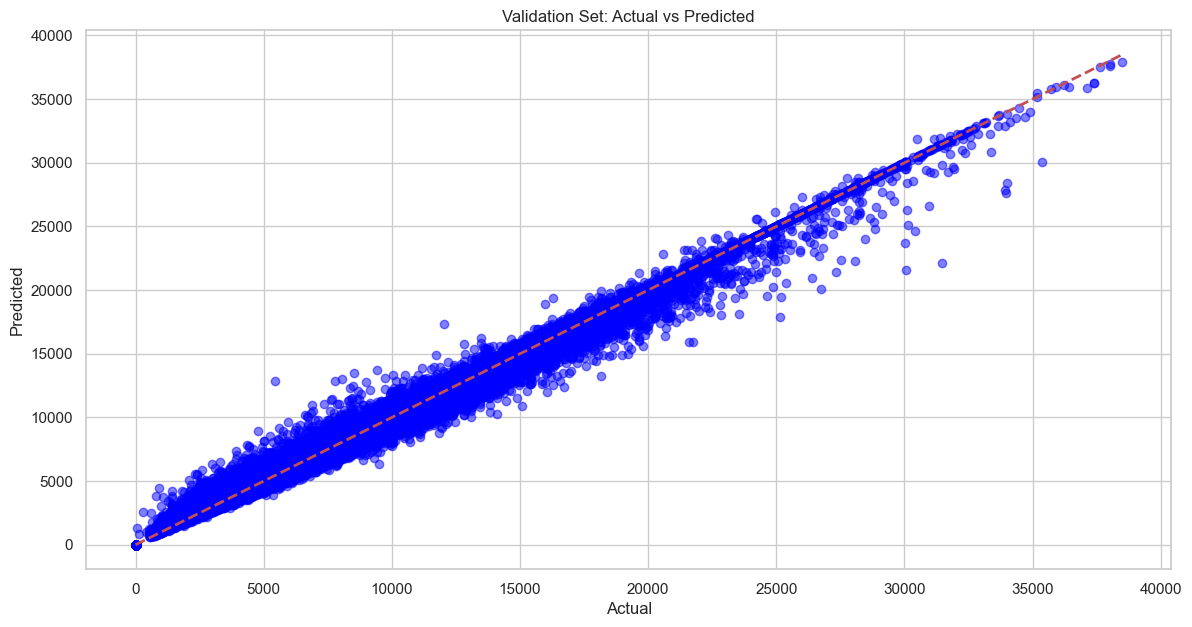

In [45]:
# Plot results
plot_actual_vs_predicted(y_train, y_pred_train_rf, "Validation Set")

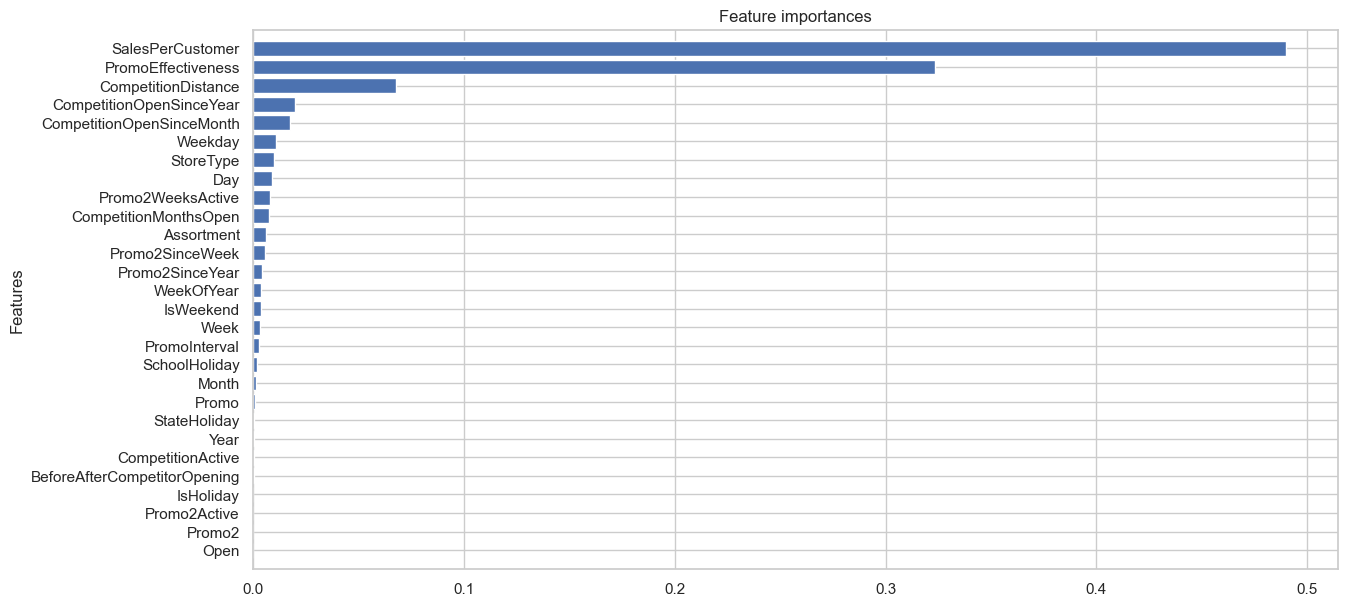

In [49]:
importances = rf_model.feature_importances_
# std = np.std([importances for tree in rf_model.estimators_], axis=0)
# np.sqrt(np.mean( (y_val - y_pred_val)**2 ))

# Plot the feature importances of the forest
plot_feature_importances(X, importances)

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Tune Random Forest
rf_model_tuned = hyperparameter_tuning(rf_model, X_train, y_train, param_grid_rf, choice='random', n_iter=5)
rf_model_tuned

In [ ]:
# Training Set Performance evaluation
y_pred_train_rf_tuned = predict(rf_model_tuned, X_train)
evaluate_model(y_train, y_pred_train_rf_tuned)

In [ ]:
# Plot results
plot_actual_vs_predicted(y_train, y_pred_train_rf_tuned, "Validation Set")

In [47]:
joblib.dump(rf_model, "../resources/models/rf_model.pkl")

['../resources/models/rf_model.pkl']

XGB

In [51]:
xgb_model = train_xgboost(X_train, y_train)
xgb_model

2025-01-12 16:09:08 - INFO - Starting to train XGBoost model...
2025-01-12 16:09:08 - INFO - Starting to train XGBoost model...
2025-01-12 16:09:08 - INFO - Starting to train XGBoost model...
2025-01-12 16:09:08 - INFO - Starting to train XGBoost model...
2025-01-12 16:09:08 - INFO - Starting to train XGBoost model...
2025-01-12 16:09:08 - INFO - Starting to train XGBoost model...
2025-01-12 16:09:08 - INFO - Starting to train XGBoost model...
2025-01-12 16:09:08 - INFO - Starting to train XGBoost model...
2025-01-12 16:09:08 - INFO - Starting to train XGBoost model...
2025-01-12 16:09:08 - INFO - Starting to train XGBoost model...
2025-01-12 16:09:08 - INFO - Starting to train XGBoost model...
2025-01-12 16:09:24 - INFO - XGBoost model training completed.
2025-01-12 16:09:24 - INFO - XGBoost model training completed.
2025-01-12 16:09:24 - INFO - XGBoost model training completed.
2025-01-12 16:09:24 - INFO - XGBoost model training completed.
2025-01-12 16:09:24 - INFO - XGBoost model t

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [52]:
# Training Set Performance evaluation
y_pred_train_xgb = predict(xgb_model, X_train)
evaluate_model(y_train, y_pred_train_xgb)


2025-01-12 16:10:31 - INFO - Starting prediction process...
2025-01-12 16:10:31 - INFO - Starting prediction process...
2025-01-12 16:10:31 - INFO - Starting prediction process...
2025-01-12 16:10:31 - INFO - Starting prediction process...
2025-01-12 16:10:31 - INFO - Starting prediction process...
2025-01-12 16:10:31 - INFO - Starting prediction process...
2025-01-12 16:10:31 - INFO - Starting prediction process...
2025-01-12 16:10:31 - INFO - Starting prediction process...
2025-01-12 16:10:31 - INFO - Starting prediction process...
2025-01-12 16:10:31 - INFO - Starting prediction process...
2025-01-12 16:10:31 - INFO - Starting prediction process...
2025-01-12 16:10:33 - INFO - Prediction process completed.
2025-01-12 16:10:33 - INFO - Prediction process completed.
2025-01-12 16:10:33 - INFO - Prediction process completed.
2025-01-12 16:10:33 - INFO - Prediction process completed.
2025-01-12 16:10:33 - INFO - Prediction process completed.
2025-01-12 16:10:33 - INFO - Prediction proce

{'MAE': 683.6625366210938,
 'MSE': 1536287.375,
 'RMSE': 1239.470602717144,
 'R2': 0.896408200263977,
 'Median AE': 226.40771,
 'Explained Variance': 0.896408200263977}

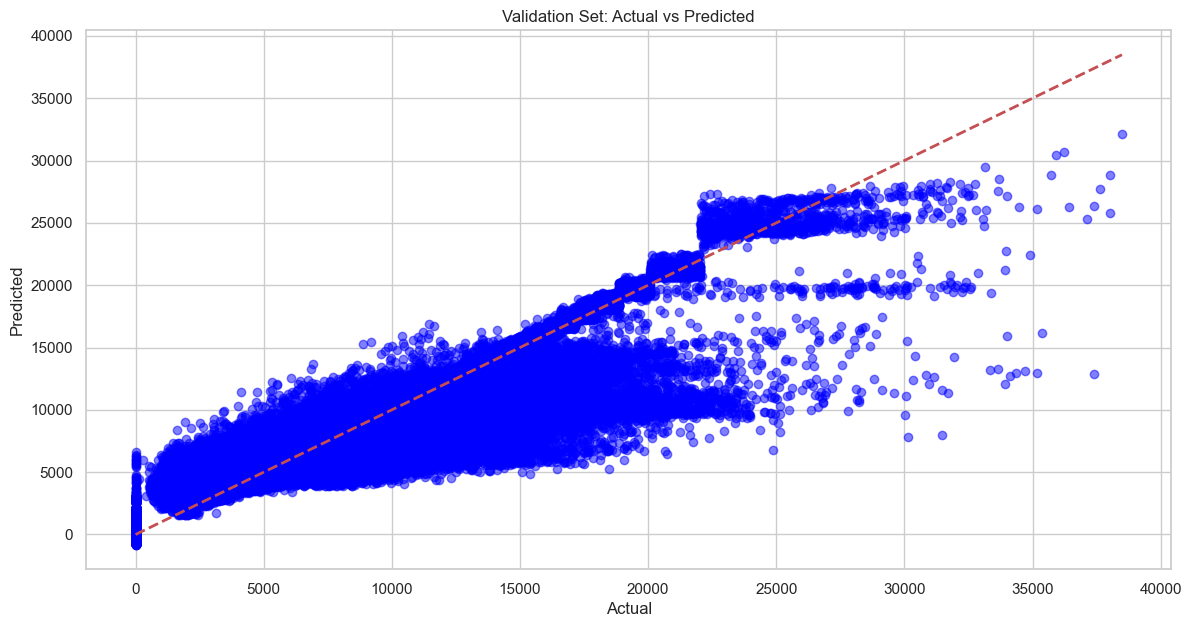

In [53]:
# Plot results
plot_actual_vs_predicted(y_train, y_pred_train_xgb, "Validation Set")

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [6, 10, 15],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model_tuned = hyperparameter_tuning(xgb_model, X_train, y_train, param_grid_xgb, n_iter=20)
xgb_model_tuned

In [ ]:
# Training Set Performance evaluation
y_pred_train_xgb_tuned = predict(xgb_model_tuned, X_train)
evaluate_model(y_train, y_pred_train_xgb_tuned)

In [ ]:
# Plot results
plot_actual_vs_predicted(y_train, y_pred_train_xgb_tuned, "Validation Set")

In [54]:
joblib.dump(xgb_model, "../resources/models/xgb_model.pkl")


['../resources/models/xgb_model.pkl']

LGB

In [55]:
lgb_model = train_lightgbm(X_train, y_train)
lgb_model


2025-01-12 16:11:03 - INFO - Starting to train LightGBM model...
2025-01-12 16:11:03 - INFO - Starting to train LightGBM model...
2025-01-12 16:11:03 - INFO - Starting to train LightGBM model...
2025-01-12 16:11:03 - INFO - Starting to train LightGBM model...
2025-01-12 16:11:03 - INFO - Starting to train LightGBM model...
2025-01-12 16:11:03 - INFO - Starting to train LightGBM model...
2025-01-12 16:11:03 - INFO - Starting to train LightGBM model...
2025-01-12 16:11:03 - INFO - Starting to train LightGBM model...
2025-01-12 16:11:03 - INFO - Starting to train LightGBM model...
2025-01-12 16:11:03 - INFO - Starting to train LightGBM model...
2025-01-12 16:11:03 - INFO - Starting to train LightGBM model...
c:\Users\Darkles\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.197816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1535
[LightGBM] [Info] Number of data points in the train set: 813767, number of used features: 28
[LightGBM] [Info] Start training from score 5774.678544


2025-01-12 16:11:16 - INFO - LightGBM model training completed.
2025-01-12 16:11:16 - INFO - LightGBM model training completed.
2025-01-12 16:11:16 - INFO - LightGBM model training completed.
2025-01-12 16:11:16 - INFO - LightGBM model training completed.
2025-01-12 16:11:16 - INFO - LightGBM model training completed.
2025-01-12 16:11:16 - INFO - LightGBM model training completed.
2025-01-12 16:11:16 - INFO - LightGBM model training completed.
2025-01-12 16:11:16 - INFO - LightGBM model training completed.
2025-01-12 16:11:16 - INFO - LightGBM model training completed.
2025-01-12 16:11:16 - INFO - LightGBM model training completed.
2025-01-12 16:11:16 - INFO - LightGBM model training completed.
c:\Users\Darkles\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` an

LGBMRegressor(metric='rmse', objective='regression', random_state=42)

In [56]:
# Training Set Performance evaluation
y_pred_train_lgb = predict(lgb_model, X_train)
evaluate_model(y_train, y_pred_train_lgb)


2025-01-12 16:11:16 - INFO - Starting prediction process...
2025-01-12 16:11:16 - INFO - Starting prediction process...
2025-01-12 16:11:16 - INFO - Starting prediction process...
2025-01-12 16:11:16 - INFO - Starting prediction process...
2025-01-12 16:11:16 - INFO - Starting prediction process...
2025-01-12 16:11:16 - INFO - Starting prediction process...
2025-01-12 16:11:16 - INFO - Starting prediction process...
2025-01-12 16:11:16 - INFO - Starting prediction process...
2025-01-12 16:11:16 - INFO - Starting prediction process...
2025-01-12 16:11:16 - INFO - Starting prediction process...
2025-01-12 16:11:16 - INFO - Starting prediction process...
c:\Users\Darkles\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-01-12 16:11:21 - INFO - Prediction process completed.
2025-01-12 16:11:21 - INFO - Prediction process com

{'MAE': 613.1735125170541,
 'MSE': 1224368.390394734,
 'RMSE': 1106.5118121352045,
 'R2': 0.917440835131372,
 'Median AE': 170.78287721619108,
 'Explained Variance': 0.9174408601695855}

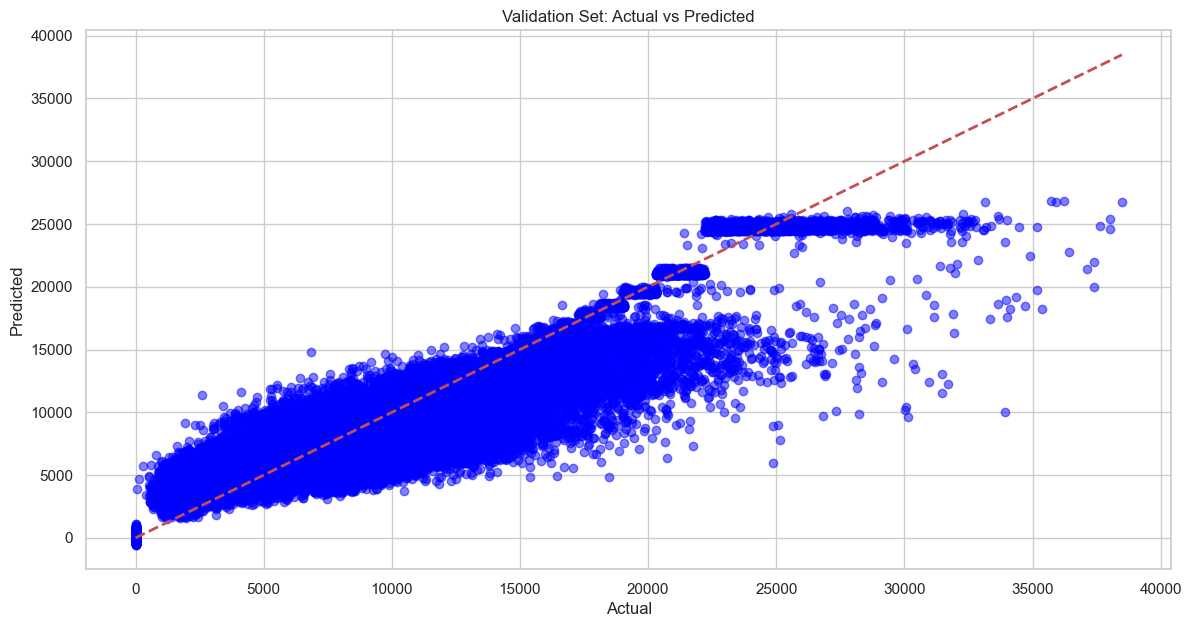

In [57]:
# Plot results
plot_actual_vs_predicted(y_train, y_pred_train_lgb, "Validation Set")

In [ ]:
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 10, 20],
    'num_leaves': [31, 50, 100],
    'feature_fraction': [0.8, 1.0]
}

lgb_model_tuned = hyperparameter_tuning(lgb_model, X_train, y_train, param_grid_lgb, n_iter=20)
lgb_model_tuned

In [ ]:
# Training Set Performance evaluation
y_pred_train_lgb_tuned = predict(lgb_model_tuned, X_train)
evaluate_model(y_train, y_pred_train_lgb_tuned)


In [ ]:
# Plot results
plot_actual_vs_predicted(y_train, y_pred_train_lgb_tuned, "Validation Set")

In [58]:
joblib.dump(lgb_model, "../resources/models/lgb_model.pkl")

['../resources/models/lgb_model.pkl']

# Ensembling

In [59]:
base_models = [
    ('lightgbm', lgb_model),
    # ('xgboost', xgb_model),
    ('random_forest', rf_model)
    # ('lightgbm', lgb_model_tuned),
    # ('xgboost', xgb_model_tuned),
    # ('random_forest', rf_model_tuned)
]

stacked_model = train_stacking(base_models, X_train, y_train)


2025-01-12 16:12:56 - INFO - Starting to train stacking model...
2025-01-12 16:12:56 - INFO - Starting to train stacking model...
2025-01-12 16:12:56 - INFO - Starting to train stacking model...
2025-01-12 16:12:56 - INFO - Starting to train stacking model...
2025-01-12 16:12:56 - INFO - Starting to train stacking model...
2025-01-12 16:12:56 - INFO - Starting to train stacking model...
2025-01-12 16:12:56 - INFO - Starting to train stacking model...
2025-01-12 16:12:56 - INFO - Starting to train stacking model...
2025-01-12 16:12:56 - INFO - Starting to train stacking model...
2025-01-12 16:12:56 - INFO - Starting to train stacking model...
2025-01-12 16:12:56 - INFO - Starting to train stacking model...
2025-01-12 16:12:56 - INFO - Starting to train stacking model...
c:\Users\Darkles\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define th

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
joblib.dump(stacked_model, "../resources/models/stacked_model.pkl")

# LTSM

In [ ]:
# Define features and target
# target = "Sales"
# drop_columns = ["Sales", "Date", "DayOfWeek", "Store", "SalesGrowthRate", "CompetitionOpenSince"]

train_preprocessed2, test_preprocessed_dl, store_preprocessed_dl, scaler_dl, label_encoders_dl = preprocess_datasets(train, test, store, method='onehot')

In [ ]:
# Create sequences
# timesteps = 30
timesteps = 2
X, y = prepare_data_for_modeling(train_preprocessed, target, drop_columns=drop_columns, sequence=True, timesteps=timesteps)
X_train, y_train, X_val, y_val = split_data(X, y)
X_train.shape, X_val.shape

In [ ]:
# Define LSTM model
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
lstm_model = build_lstm_model(input_shape)
lstm_model.summary()

In [ ]:
# Train the model
history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)
history

In [ ]:
# Training Loss and MAE
train_loss, train_mae = lstm_model.evaluate(X_train, y_train)
train_loss, train_mae

In [ ]:
# Validation Loss and MAE
val_loss, val_mae = lstm_model.evaluate(X_val, y_val)
val_loss, val_mae

In [ ]:
y_pred = lstm_model.predict(X_val)
y_pred

In [ ]:
lstm_model.save("../resources/models/lstm_sales_model.h5")
lstm_model.save("../resources/models/saved_model")


In [ ]:
# Evaluate LSTM model
evaluate_model(y_val, y_pred)

In [ ]:
lstm_model = load_model("../resources/models/lstm_sales_model.h5")

# Bidirectional LTSM

In [ ]:
# # Create sequences
# # timesteps = 30
# timesteps = 2
# X, y = prepare_data_for_modeling(train_preprocessed, target, drop_columns=drop_columns, sequence=True, timesteps=timesteps)
# X_train, y_train, X_val, y_val = split_data(X, y)
# X_train.shape, X_val.shape

In [ ]:
# Define LSTM model
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
bdlstm_model = build_bidirectional_lstm(input_shape)
bdlstm_model.summary()

In [ ]:
# Train the model
history = bdlstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)
history

In [ ]:
# Training Loss and MAE
train_loss, train_mae = bdlstm_model.evaluate(X_train, y_train)
train_loss, train_mae

In [ ]:
# Validation Loss and MAE
val_loss, val_mae = bdlstm_model.evaluate(X_val, y_val)
val_loss, val_mae

In [ ]:
y_pred = bdlstm_model.predict(X_val)
y_pred

In [ ]:
bdlstm_model.save("../resources/models/bd-lstm_sales_model.h5")

In [ ]:
# Evaluate LSTM model
evaluate_model(y_val, y_pred)

In [ ]:
lstm_model = load_model("../resources/models/bd-lstm_sales_model.h5")

# Hyperparameter Tunig for LTSM and BI-LTSM

In [43]:
LTSM_CONFIG = {
    "units": [32, 64, 128],
    "dropout": [0.1, 0.2, 0.3],
    "learning_rate": [0.001, 0.0005],
    "batch_size": [32, 64],
    "epochs": [50, 100]
}

In [ ]:
best_model, best_metrics = hyperparameter_tuning_LTSM(X_train, y_train, X_val, y_val, config=LTSM_CONFIG)

In [ ]:
best_model.save("../resources/models/tuned-lstm_sales_model.h5")

In [ ]:
best_model_bd, best_metrics_bd = hyperparameter_tuning_LTSM(X_train, y_train, X_val, y_val, config=LTSM_CONFIG)

In [ ]:
best_model_bd.save("../resources/models/tuned-bd-lstm_sales_model.h5")